#**1. El problema a tratar**
El problema abordado se centra en mejorar el diagnóstico temprano de la enfermedad de Parkinson, que actualmente se basa en observaciones clínicas subjetivas. La pregunta a responder es cómo podemos utilizar técnicas de análisis de video y audio para identificar patrones distintivos en los síntomas motores, como la rigidez facial y los trastornos del habla, y así desarrollar un enfoque multimodal que permita una detección precoz y precisa de la enfermedad, mejorando la calidad de vida de los pacientes y facilitando la planificación de tratamientos oportunos.

¿Qué patrones característicos de la enfermedad de Parkinson, como la rigidez facial (hipomimia) y los trastornos del habla (disartria) tienen las personas parkinsonianas para desarrollar un modelo de detección temprana y precisa de la enfermedad?

#**2. Acerca del set de datos**

La información recolectada por John se encuentra en [archiv CSV, carpetas, JSON, informacion]  con [n filas] y [n columnas]

Cada registro tiene [n caracteristicas] y una catergoría ("yes" o "no" depediendo de si la persona tiene Parkison o es paciente de control). Las columnas son:

1. "sex": genero (categórico: "masculino, "femenino")
2. "age": edad (numérica)
...

#3. **Lectura del dataset**

In [25]:
#@title Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Novedad - Para tratar con imágenes
import cv2
from PIL import Image

# Permite listar los archivos en un directorio
from glob import glob

# Novedad - Para tratar con audios
import librosa
import librosa.display
import IPython.display as ipd # Nos permite reproducir audios en el Notebook

# Para mejorar el diseño del Notebook
from itertools import cycle

sns.set_theme(style="white", palette = None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [ ]:
#@title Lectura de los datos
import os
from google.colab import drive
drive.mount('/content/drive')

path_data = "" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_data
data = pd.read_csv(path)

os.chdir(path)
print(os.getcwd())

In [ ]:
#@title Alternativa
# Moverse a la carpeta donde guardamos los datos
%cd "drive/MyDrive/" + path_data

In [ ]:
print(data.shape)
data.head()
# data.describe()


#**4. Análisis exploratorio**

Se llevaran a cabo las siguientes fases:
1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de pariables predictoras con la variable a predecir

##**4.1 Análisis de cada variable de manera individual**

In [ ]:
#@title Observar las caractreísticas de cada varibale

data.info()

Sinceramente, pienso que no podemos realizar un análisis exploratorio convencional, dado que posiblemente no podamos relacionar los datos de las personas con una imagen, entonces sería:

1. Mostrar los datos de las personas como lo hemos venido haciendo
2. Mostrar imágenes de paciente con Parkinson vs Control, asegurándonos de revelar la identidad, y realizar un análisis subjetivo (o sea nosotros) de qué detalles podemos identificar entre los dos
3. Lo mismo para la parte del audio

Para hacer eso tendríamos que saber:

- Separar imágenes de audios (suponiendo que no esté separado)
- Mostrar imágenes y audios en Python

#**Extra (se tiene que quitar): Manejo de archivos (imágenes y audio)**

In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive/')
# Esta es una carpeta en mi drive
%cd /content/gdrive/MyDrive/semilleroEstudiantes/introducción a python

Mounted at /content/gdrive/
/content/gdrive/MyDrive/semilleroEstudiantes/introducción a python


In [ ]:
## Imágenes

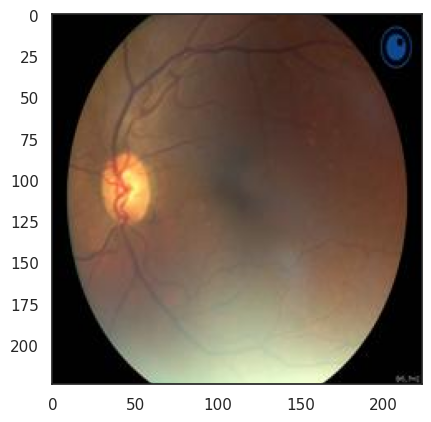

In [26]:
#@title Mostrando imágenes con PIL y Matplotlib


# import matplotlib.pyplot as plt
# import numpy as np
# from PIL import Image

img = np.asarray(Image.open('imagenes/IM0535EY.JPG'))
imgplot = plt.imshow(img)

Altura: 224, Ancho: 224, Canales (RGB):3


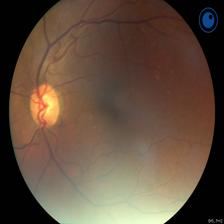

In [27]:
#@title Mostrando imágenes con Open CV
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('imagenes/IM0535EY.JPG')
(h, w, c) = image.shape[:3]
print(f"Altura: {h}, Ancho: {w}, Canales (RGB):{c}")
cv2_imshow(image)

## Audio

In [47]:
# Especifica la ruta de tu archivo de audio
audio_paths = glob('../introducción a python/audio.wav') # Perdón Muñoz

# Selecciona la primera ruta de archivo de la lista (aunque solo haya uno)
ipd.Audio(audio_paths[0])

In [48]:
# Carga el archivo de audio y su frecuencia de muestreo
y, sr = librosa.load(audio_paths[0])
# y: raw data
# sr: integer value of the sample rate